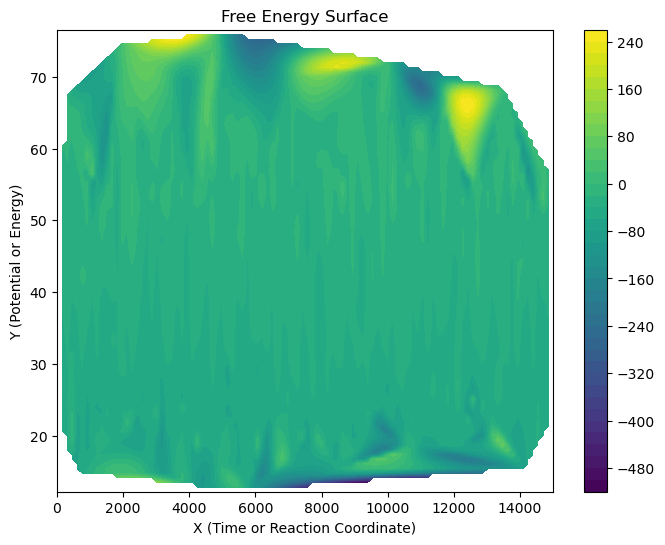

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 读取 .xvg 文件
def read_xvg(filename):
    """
    从.xvg文件中读取数据，跳过注释行
    """
    data = np.loadtxt(filename, comments=['#', '@'])
    return data[:, 0], data[:, 1], data[:, 2]  # 假设第一列为x，第二列为y，第三列为z

# 读取 potential.xvg 文件
x_values, y_values, z_values = read_xvg('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/T300/potential.xvg')

# 创建网格，用于插值数据
xi = np.linspace(x_values.min(), x_values.max(), 100)
yi = np.linspace(y_values.min(), y_values.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# 插值数据生成平滑的自由能面
zi = griddata((x_values, y_values), z_values, (xi, yi), method='cubic')

# 绘制自由能面的等高线图
plt.figure(figsize=(8, 6))
contour = plt.contourf(xi, yi, zi, 50, cmap='viridis')
plt.colorbar(contour)
plt.title('Free Energy Surface')
plt.xlabel('X (Time or Reaction Coordinate)')
plt.ylabel('Y (Potential or Energy)')
plt.savefig('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Figures/FES-T300.png')
plt.show()


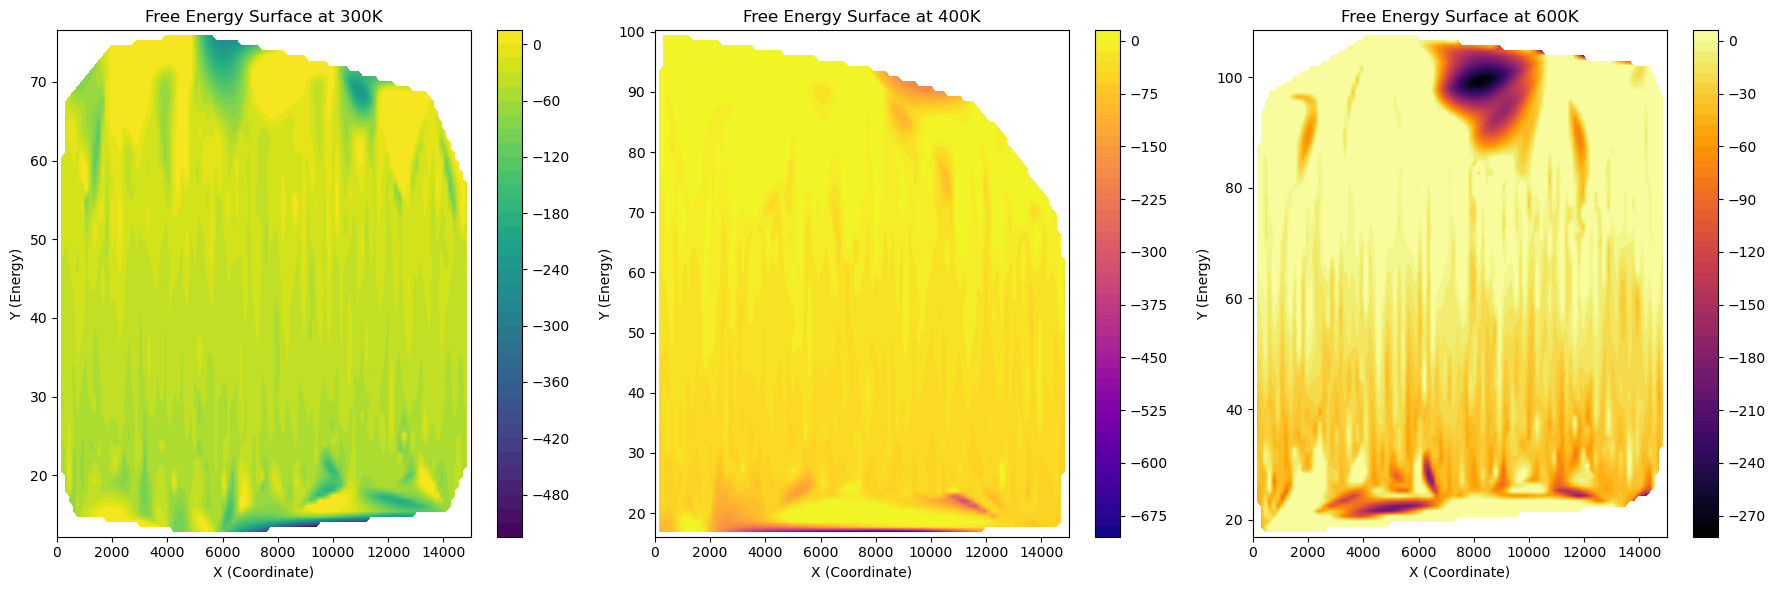

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 读取 .xvg 文件
def read_xvg(filename):
    """
    从.xvg文件中读取数据，跳过注释行
    """
    data = np.loadtxt(filename, comments=['#', '@'])
    return data[:, 0], data[:, 1], data[:, 2]  # 假设第一列为x，第二列为y，第三列为z

# 设置最大自由能为 6 kT
def compute_fes_with_max_kT(x_values, y_values, z_values, fes_max=6):
    """
    计算自由能面并限制最大值为 6 kT
    """
    xi = np.linspace(x_values.min(), x_values.max(), 100)
    yi = np.linspace(y_values.min(), y_values.max(), 100)
    xi, yi = np.meshgrid(xi, yi)

    # 插值生成平滑的自由能面
    zi = griddata((x_values, y_values), z_values, (xi, yi), method='cubic')
    
    # 将自由能限制在 6 kT
    zi = np.clip(zi, None, fes_max)
    
    return xi, yi, zi

# 读取不同温度下的 .xvg 文件 (假设这些文件已经生成)
x_values_300K, y_values_300K, z_values_300K = read_xvg('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/T300/potential.xvg')
x_values_400K, y_values_400K, z_values_400K = read_xvg('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/T400/potential.xvg')
x_values_600K, y_values_600K, z_values_600K = read_xvg('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/T600/potential.xvg')

# 计算并生成自由能面，限制在 6 kT
xi_300K, yi_300K, zi_300K = compute_fes_with_max_kT(x_values_300K, y_values_300K, z_values_300K)
xi_400K, yi_400K, zi_400K = compute_fes_with_max_kT(x_values_400K, y_values_400K, z_values_400K)
xi_600K, yi_600K, zi_600K = compute_fes_with_max_kT(x_values_600K, y_values_600K, z_values_600K)

# 绘制不同温度下的自由能面图
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 300K
contour_300K = axs[0].contourf(xi_300K, yi_300K, zi_300K, 50, cmap='viridis')
axs[0].set_title('Free Energy Surface at 300K')
axs[0].set_xlabel('X (Coordinate)')
axs[0].set_ylabel('Y (Energy)')
fig.colorbar(contour_300K, ax=axs[0])

# 400K
contour_400K = axs[1].contourf(xi_400K, yi_400K, zi_400K, 50, cmap='plasma')
axs[1].set_title('Free Energy Surface at 400K')
axs[1].set_xlabel('X (Coordinate)')
axs[1].set_ylabel('Y (Energy)')
fig.colorbar(contour_400K, ax=axs[1])

# 600K
contour_600K = axs[2].contourf(xi_600K, yi_600K, zi_600K, 50, cmap='inferno')
axs[2].set_title('Free Energy Surface at 600K')
axs[2].set_xlabel('X (Coordinate)')
axs[2].set_ylabel('Y (Energy)')
fig.colorbar(contour_600K, ax=axs[2])

plt.tight_layout()
plt.savefig('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Figures/FES-limit_6kT.png')
plt.show()
